In [15]:
import os
import numpy as np
import cv2
import matplotlib . pyplot as plt

In [16]:
dataset_dir = '/content/drive/MyDrive/Project_NCKH/animals'
image_filenames = os.listdir(dataset_dir)[:500]
src_images = []
for filename in image_filenames :
    filepath = os.path.join(
        dataset_dir,filename
    )
    image = cv2.imread(filepath)
    image = cv2.cvtColor(
        image,cv2.COLOR_BGR2RGB
    )
    src_images.append(image)

In [17]:
def image_resize (images, target_size=(224, 224) ) :
    resized_image = cv2.resize (images, target_size )
    return resized_image

In [34]:
query_image_path = "/content/drive/MyDrive/Project_NCKH/animals/0a3d16566f.jpg"
query_image = cv2.imread(query_image_path , 1)

In [35]:
query_image.shape

(730, 900, 3)

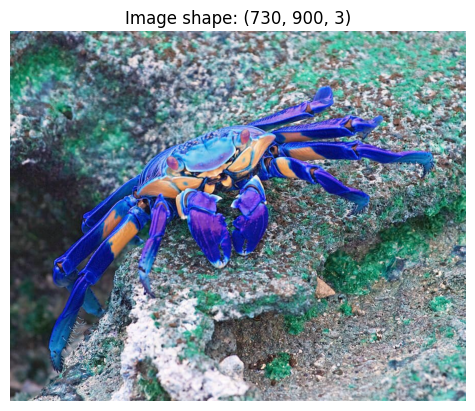

In [36]:
plt.imshow(query_image)
plt.axis('off')
plt.title(f'Image shape: {query_image.shape}')
plt.show()

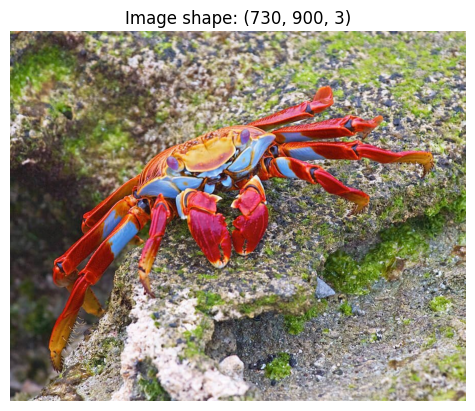

In [41]:
query_image = cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB)
plt.imshow(query_image)
plt.axis('off')
plt.title(f'Image shape: {query_image.shape}')
plt.show()

In [37]:
image_rs = image_resize(query_image)

In [38]:
image_rs.shape

(224, 224, 3)

In [39]:
image_rs = cv2.cvtColor(image_rs, cv2.COLOR_BGR2RGB)

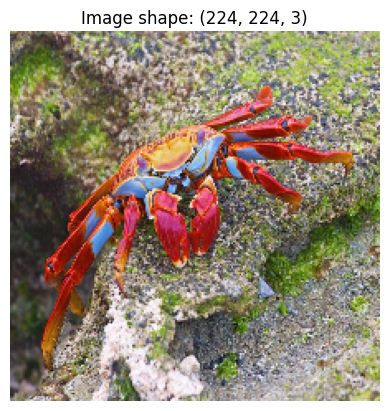

In [40]:
plt.imshow(image_rs)
plt.axis('off')
plt.title(f'Image shape: {image_rs.shape}')
plt.show()

In [ ]:
def calculate_mean_std(images) :
    mean = np.mean(images, axis =(0, 1, 2) )
    std = np.std(images, axis =(0, 1, 2) )

    return mean, std

In [ ]:
def image_std_normalize (images, mean, std) :
    normalized_image = (images - mean)/std
    return normalized_image

In [ ]:
def image_flatten (images, is_batch = False ) :
    if is_batch :
        flattened_image = images.reshape (images.shape[0], -1)
    else :
        flattened_image = images.reshape(-1)

    return flattened_image

In [ ]:
def preprocess_batches (images) :
    resized_images = [
        image_resize(image) for image in images
    ]
    images_arr = np.array(resized_images )
    mean , std = calculate_mean_std(images_arr)
    normalized_images = image_std_normalize(
        images_arr,
        mean, std
    )
    flattened_images = image_flatten (
        normalized_images,
        is_batch = True
    )
    return flattened_images, mean , std

In [ ]:
def preprocess_query (image) :
    resized_image = image_resize(image)
    mean, std = calculate_mean_std(resized_image)
    normalized_image = image_std_normalize (
        resized_image,
        mean, std
    )
    flattened_image = image_flatten(normalized_image)

    return flattened_image

In [ ]:
def cosine_similarity(query_vector, src_vectors ) :
    query_norm = np.linalg.norm(query_vector )
    normalized_query = query_vector / query_norm
    src_norms = np.linalg.norm (src_vectors,axis =1)
    normalized_src = src_vectors / src_norms[: , np.newaxis ]

    cosine_similarity = np.dot(normalized_src,normalized_query )

    return cosine_similarity

In [ ]:
def ranking (preprocessed_query_image , preprocessed_src_images , top_k) :
    scores = cosine_similarity(
        preprocessed_query_image,
        preprocessed_src_images[0]
    )
    ranked_list = np.argsort(scores)[::-1][:top_k ]
    scores = scores[ranked_list ]

    return ranked_list, scores

In [ ]:
preprocessed_src_images = preprocess_batches(src_images)
query_image_paths = "/content/drive/MyDrive/Project_NCKH/images_mr/1.jpg"
top_k = 5

Query Image


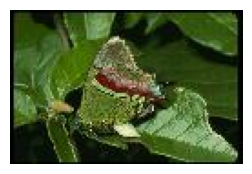

Top 5 results


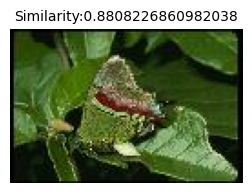

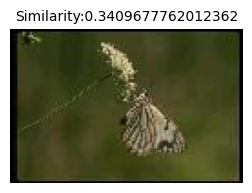

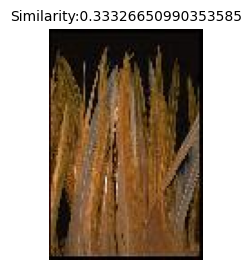

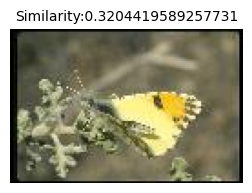

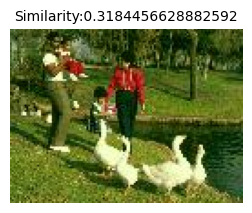

In [ ]:

query_image = cv2.imread(query_image_paths , 1)
query_image = cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB )
preprocessed_query_image = preprocess_query(query_image )


ranked_list, scores = ranking(
    preprocessed_query_image ,
    preprocessed_src_images ,
    top_k
)

print ('Query Image')
plt.figure(figsize =(3, 3))
plt.imshow(query_image )
plt.axis('off')
plt.show()
print(f'Top {top_k} results')
for idx in range (len(ranked_list)) :
    src_image_idx = ranked_list[idx]
    similarity_score = scores[idx]
    plt.figure(figsize =(3, 3) )
    plt.imshow(src_images[src_image_idx])
    plt.title(f'Similarity:{similarity_score}',fontsize=10)
    plt.axis('off')
    plt.show()